# Mission 1. Netfilx and Code

### Mandatory Part
- 한국 작품은 총 얼마나 있는가?
    - country column을 기준으로 한다.
    - "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

### 답 : 183 개

In [39]:
import numpy as np
import pandas as pd

netflix_data = pd.read_csv("./netflix_titles.csv")

netflix_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [40]:
netflix_data['country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       nan, 'Norway, Iceland, United States', 'United Kingdom', 'Japan',
       'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania', 'Spain',
       'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada, Unit

In [45]:
netflix_data[netflix_data['country'] == 'South Korea'].count()

show_id         183
type            183
title           183
director         44
cast            180
country         183
date_added      183
release_year    183
rating          183
duration        183
listed_in       183
description     183
dtype: int64

### Bonus Part
- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
    - country column을 기준으로 한다
    - 단일 국가인 경우를 기준으로 결과를 구해보자.

### 답 : United States, 2555 작품

In [123]:
nf_country_group = netflix_data.groupby(by=netflix_data['country'])['country'].count()
nf_country_only = nf_country_group[nf_country_group.index.str.contains(",") == False]
nf_country_only[nf_country_only.loc[:] == nf_country_only.max()]

# nt_country = netflix_data.dropna(subset=['country'])['country']
# nt_country_only = nt_country[nt_country.str.contains(",") == False]


country
United States    2555
Name: country, dtype: int64

# Mission 2. 가즈아!

### Mandatory Part

다음 데이터가 주어졌을 때 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.

- 선의 색깔은 노란색(#f2a900) 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 `Open` Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [132]:
bit = pd.read_csv('./BitCoin.csv')
bit.tail(5)

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
1604,1604,2013-02-05,116.38,125.60,92.28,105.21,6722784.102,1292190000
1605,1605,2013-01-05,139.00,139.89,107.72,116.99,8026718.801,1542820000
1606,1606,2013-04-30,144.00,146.93,134.05,139.00,8312655.246,1597780000
1607,1607,2013-04-29,134.44,147.49,134.00,144.54,7757951.030,1491160000
1608,1608,2013-04-28,135.30,135.98,132.10,134.21,7806647.629,1500520000


In [277]:
# 기간 2016.06.01 ~ 2017.06.30 , datetime 처리
bit_date_open = bit.sort_values(by=['Date'], axis=0)[['Date', 'Open']]
bit_date_open["Date"] = pd.to_datetime(bit_date_open["Date"])
bit_date_open.set_index(bit_date_open['Date'], drop=True, inplace=True)

period_bit = bit_date_open.loc["2016-06-01":"2017-07-01"]
btc_date = period_bit['Date']
btc_ma5 = period_bit['Open'].rolling(5).mean()
btc_ma5

Date
2016-06-01         NaN
2016-06-02         NaN
2016-06-03         NaN
2016-06-04         NaN
2016-06-05     418.238
                ...   
2017-06-27    2624.426
2017-06-28    2593.564
2017-06-29    2559.372
2017-06-30    2545.770
2017-07-01    2208.354
Name: Open, Length: 378, dtype: float64

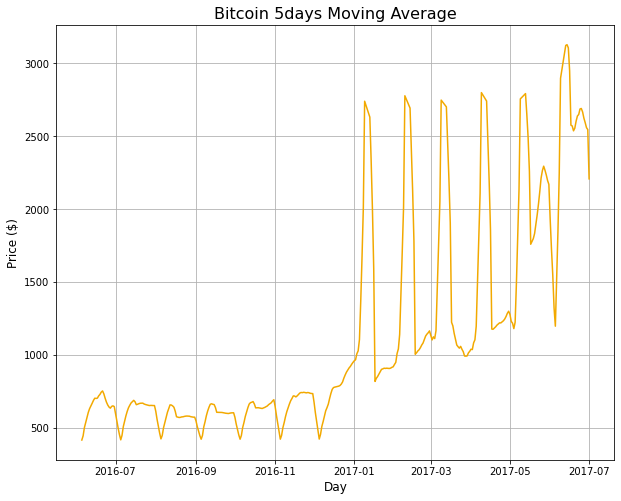

In [297]:
plt.figure(figsize=(10, 8))
plt.plot(btc_date, btc_ma5, color='#f2a900')

plt.title("Bitcoin 5days Moving Average", fontsize = 16)
plt.grid()
plt.xlabel("Day", fontsize = 12)
plt.ylabel("Price ($)", fontsize = 12)
plt.show()

### Bonus Part

- 선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 Open Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [290]:
eth = pd.read_csv("./ETH_day.csv", parse_dates=True, usecols=["Date", "Open"])
eth.sort_values(by=['Date'],inplace=True)
eth["Date"] = pd.to_datetime(eth["Date"])
eth.set_index(eth["Date"], drop=True, inplace=True)

In [291]:
period_eth = eth.loc["2016-06-01":"2017-07-01"]
eth_date = period_eth['Date']
eth_ma5 = period_eth["Open"].rolling(5).mean()
eth_ma5

Date
2016-06-01        NaN
2016-06-02        NaN
2016-06-03        NaN
2016-06-04        NaN
2016-06-05     13.982
               ...   
2017-06-27    296.592
2017-06-28    289.898
2017-06-29    288.066
2017-06-30    285.866
2017-07-01    286.280
Name: Open, Length: 396, dtype: float64

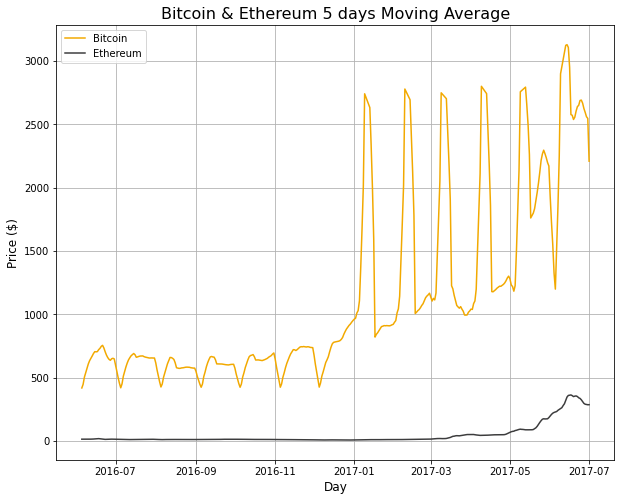

In [299]:
fig = plt.figure(figsize=(10,8))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(btc_date,btc_ma5,color='#f2a900',label='Bitcoin')
ax.plot(eth_date,eth_ma5,color='#3c3c3d',label='Ethereum')

plt.title("Bitcoin & Ethereum 5 days Moving Average", fontsize = 16)
plt.grid()
plt.xlabel("Day", fontsize = 12)
plt.ylabel("Price ($)", fontsize = 12)
ax.legend()

plt.show()